# Klasyfikacja obrazów z wykorzystaniem zbioru MNIST i prostej sieci CNN

## 1. Wprowadzenie

Celem tego notatnika jest zbudowanie od podstaw prostej konwolucyjnej sieci neuronowej (CNN) do klasyfikacji obrazów cyfr odręcznych ze zbioru MNIST. Przejdziemy od opisu danych, przez wyjaśnienie działania sieci CNN, aż do treningu modelu i wizualizacji wyników.

---

## 2. Zbiór danych MNIST

MNIST (Modified National Institute of Standards and Technology) to klasyczny zbiór do zadań rozpoznawania cyfr.  
Zawiera:
- 60 000 obrazów w zbiorze treningowym,
- 10 000 obrazów w zbiorze testowym,
- rozmiar obrazu: $28 \times 28$ pikseli,
- 1 kanał (obraz w odcieniach szarości),
- etykiety: cyfry od 0 do 9.

Każdy obraz przedstawia jedną cyfrę, wycentrowaną i znormalizowaną.

W zadaniu klasyfikacji chcemy zbudować funkcję
$$ f: \mathbb{R}^{28 \times 28 \times 1} \to \{0,1,\dots,9\} $$
która dla obrazu zwróci numer cyfry.

---

## 3. Konwolucyjne sieci neuronowe (CNN) – idea

Zwykła sieć w pełni połączona (Dense) traktuje obraz jako długi wektor pikseli. CNN wykorzystuje strukturę obrazu: sąsiedztwo pikseli i lokalne wzorce.

Główne elementy CNN:

1. **Warstwa konwolucyjna (Conv2D)**  
   Używa filtrów (jąder) przesuwanych po obrazie. Każdy filtr uczy się wykrywać pewien wzorzec (np. krawędzie, rogi).  
   Dla obrazu wejściowego $X$ i filtra $K$ operacja konwolucji jest przybliżona przez
   $$
   (X * K)(i,j) = \sum_m \sum_n X(i+m, j+n)\, K(m,n)
   $$
   (w praktyce używa się wersji dyskretnej z paddingiem i krokiem).

2. **Warstwa aktywacji (np. ReLU)**  
   Nieliniowość:  
   $$
   \text{ReLU}(x) = \max(0, x)
   $$

3. **Warstwa pooling (np. MaxPooling2D)**  
   Zmniejsza rozmiar przestrzenny map cech, wybierając np. maksimum z małego okna. Dzięki temu sieć jest bardziej odporna na przesunięcia i ma mniej parametrów.

4. **Warstwy gęste (Dense)**  
   Na końcu mapy cech są spłaszczane i podawane do zwykłej sieci klasyfikacyjnej.

---

## 4. Architektura naszej prostej sieci

Zbudujemy małą sieć CNN:

1. Wejście: obraz $28 \times 28 \times 1$
2. Conv2D(32, (3,3)) + ReLU
3. MaxPooling2D((2,2))
4. Conv2D(64, (3,3)) + ReLU
5. MaxPooling2D((2,2))
6. Flatten
7. Dense(128) + ReLU
8. Dense(10) + Softmax

Ostatnia warstwa ma 10 wyjść, ponieważ w MNIST jest 10 klas.

Funkcja softmax:
$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$
gdzie $K=10$ – liczba klas.

---

## 5. Funkcja straty i metryki

Do klasyfikacji wieloklasowej użyjemy straty `categorical_crossentropy` (lub `sparse_categorical_crossentropy`, jeśli etykiety są jako liczby całkowite).

Dla próbki o prawdziwym rozkładzie $y$ i przewidywanym rozkładzie $\hat{y}$:
$$
L = - \sum_{i=1}^{K} y_i \log(\hat{y}_i)
$$

Jako metrykę będziemy śledzić `accuracy`.

---

## 6. Trening sieci – parametry `.fit()`

Metoda `model.fit(...)` pozwala sterować treningiem. Najważniejsze parametry:

- `epochs` – ile razy przejdziemy przez cały zbiór treningowy,
- `batch_size` – ile próbek jest przetwarzanych naraz i na ich podstawie liczony jest gradient,
- `validation_data` lub `validation_split` – sprawdzenie jakości na danych walidacyjnych,
- `callbacks` – np. wczesne zatrzymanie (EarlyStopping),
- `verbose` – poziom wypisywania logów.

Uczenie sieci polega na minimalizacji straty przy pomocy optymalizatora (np. `adam`).

---

## 7. Wizualizacja klas

Przed treningiem warto obejrzeć kilka przykładowych obrazów z etykietami, aby upewnić się, że dane są poprawnie wczytane i mają oczekiwany format. Można też po treningu obejrzeć prognozy modelu i porównać z etykietami.

---

## 8. Podsumowanie

1. MNIST to prosty zbiór 10 klas.
2. CNN są lepiej dopasowane do obrazów niż zwykłe sieci Dense.
3. Nawet bardzo prosta architektura pozwala osiągnąć wysoką dokładność na MNIST.
4. Parametry treningu (`epochs`, `batch_size`, `validation_split`) wpływają na szybkość i jakość uczenia.


## CZĘŚĆ 2 - PRAKTYCZNA Budowa klasyfikatora

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# wczytanie zbioru MNIST z Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("train:", x_train.shape, y_train.shape)
print("test:", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train: (60000, 28, 28) (60000,)
test: (10000, 28, 28) (10000,)


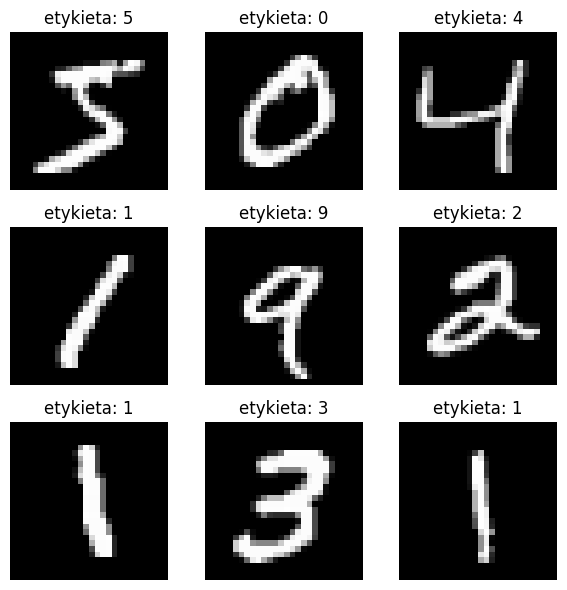

In [ ]:
# wyświetlimy pierwsze 9 obrazów ze zbioru treningowego
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"etykieta: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# przeskalowanie do zakresu [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# dodanie wymiaru kanału: (28, 28) -> (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("nowy kształt train:", x_train.shape)


nowy kształt train: (60000, 28, 28, 1)


In [ ]:
model = keras.Sequential([
    # blok 1
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # blok 2
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # przejście do klasyfikatora
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Kompilacja modelu – funkcja straty, optymalizator i metryki

Po zbudowaniu architektury modelu w Keras należy go **skompilować**, aby określić sposób uczenia sieci.  
Kompilacja definiuje:
- **funkcję straty** (loss function),
- **optymalizator** (optimizer),
- **metryki oceny** (metrics).

---

## 1. Funkcja straty (loss function)

Funkcja straty mierzy, jak bardzo przewidywania modelu różnią się od prawdziwych etykiet.  
Uczenie polega na **minimalizacji tej funkcji** za pomocą optymalizatora.

### Najczęściej stosowane funkcje straty:

1. **Dla klasyfikacji:**
   - `categorical_crossentropy`  
     używana, gdy etykiety są w postaci wektorów one-hot.  
     $$ L = - \sum_{i=1}^{K} y_i \log(\hat{y}_i) $$
   - `sparse_categorical_crossentropy`  
     używana, gdy etykiety są w postaci liczb całkowitych 0, 1, ..., K−1.  
     $$ L = - \log(\hat{y}_{y_{\text{true}}}) $$

2. **Dla regresji:**
   - `mean_squared_error (MSE)`  
     $$ L = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2 $$
   - `mean_absolute_error (MAE)`  
     $$ L = \frac{1}{N}\sum_{i=1}^{N}|y_i - \hat{y}_i| $$

3. **Dla zadań binarnych (np. klasyfikacja 0/1):**
   - `binary_crossentropy`  
     $$ L = -[y \log(\hat{y}) + (1 - y)\log(1 - \hat{y})] $$

---

## 2. Optymalizatory (optimizers)

Optymalizator określa, jak model ma aktualizować wagi podczas treningu, aby zminimalizować stratę.  
Każdy z nich korzysta z pewnego wariantu **metody spadku gradientu**.

### 2.1. Podstawowy algorytm – Gradient Descent

Dla każdej wagi $w$ w iteracji $t$:

$$
w_{t+1} = w_t - \eta \frac{\partial L}{\partial w_t}
$$

gdzie:
- $ \eta $ – współczynnik uczenia (learning rate),
- $ \frac{\partial L}{\partial w_t} $ – gradient funkcji straty względem wagi.

---

### 2.2. Popularne optymalizatory w Keras

| Optymalizator | Idea działania | Wzór aktualizacji |
|----------------|----------------|-------------------|
| **SGD** (Stochastic Gradient Descent) | Klasyczna metoda spadku gradientu, może mieć moment (momentum). | $$ v_t = \beta v_{t-1} + (1-\beta)\nabla L(w_t) \\ w_{t+1} = w_t - \eta v_t $$ |
| **RMSprop** | Normalizuje krok przez średni kwadrat gradientu. | $$ E[g^2]_t = \rho E[g^2]_{t-1} + (1-\rho)g_t^2 \\ w_{t+1} = w_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t $$ |
| **Adam** | Łączy momentum i RMSprop, automatycznie dostosowuje learning rate. | $$ m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t \\ v_t = \beta_2 v_{t-1} + (1-\beta_2)g_t^2 \\ \hat{m}_t = \frac{m_t}{1-\beta_1^t},\ \hat{v}_t = \frac{v_t}{1-\beta_2^t} \\ w_{t+1} = w_t - \frac{\eta \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} $$ |
| **Adagrad** | Dostosowuje learning rate dla każdego parametru osobno. | $$ w_{t+1} = w_t - \frac{\eta}{\sqrt{G_t + \epsilon}} g_t $$ |

W praktyce:
- `Adam` jest najczęściej używany,
- `SGD` bywa stosowany, gdy zależy nam na lepszej generalizacji,
- `RMSprop` często dla modeli rekurencyjnych (RNN, LSTM).

---

## 3. Metryki (metrics)

Metryki służą do oceny jakości modelu.  
W przeciwieństwie do funkcji straty, **nie wpływają na uczenie**, a jedynie pozwalają monitorować postępy.

### 3.1. Najczęściej używane metryki

1. **Accuracy (dokładność):**
   $$ \text{Accuracy} = \frac{\text{liczba poprawnych predykcji}}{\text{liczba wszystkich próbek}} $$

2. **Precision (precyzja):**
   $$ \text{Precision} = \frac{TP}{TP + FP} $$

3. **Recall (czułość):**
   $$ \text{Recall} = \frac{TP}{TP + FN} $$

4. **F1-score:**
   $$ \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

5. **AUC (Area Under Curve):**
   pole pod krzywą ROC – miara jakości klasyfikacji binarnej.

---

## 4. Przykład kompilacji w Keras

Dla klasyfikacji wieloklasowej (jak MNIST):

```python
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # bo y_train są jako liczby 0..9
    metrics=["accuracy"]
)


# Trenowanie modelu (`model.fit`) – teoria i najważniejsze parametry

Uczenie sieci neuronowej polega na **minimalizacji funkcji straty** poprzez dostosowywanie wag modelu, aby przewidywania były coraz bliższe wartościom rzeczywistym.  
Podstawowy mechanizm uczenia to **spadek gradientu (Gradient Descent)**:

$$
w_{t+1} = w_t - \eta \frac{\partial L}{\partial w_t}
$$

gdzie:  
- $L$ – funkcja straty (np. crossentropy),  
- $\eta$ – współczynnik uczenia (*learning rate*),  
- $\frac{\partial L}{\partial w_t}$ – gradient straty względem wag.  

---

## Najważniejsze parametry metody `fit(...)`

Metoda `fit()` w Keras uruchamia proces uczenia sieci neuronowej:

```python
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


## Opis kluczowych parametrów:

- **epochs** – liczba **epok**, czyli ile razy model przejdzie przez cały zbiór treningowy.  
  Każda epoka to pełny cykl: *predykcja → obliczenie straty → aktualizacja wag*.  
  Zbyt wiele epok może prowadzić do **przeuczenia (overfitting)**,  
  zbyt mało – do **niedouczenia (underfitting)**.

- **batch_size** – liczba próbek wykorzystywanych w jednej aktualizacji wag (*mini-batch*).  
  Jeśli zbiór treningowy ma $N$ próbek, liczba iteracji w epoce wynosi:

  $$
  \text{liczba iteracji w epoce} = \frac{N}{\text{batch\_size}}
  $$

  Większe batch’e stabilizują gradient, ale zwiększają zużycie pamięci.

- **validation_split** – ułamek danych treningowych (np. 0.1 = 10%), wykorzystywany do oceny jakości modelu po każdej epoce.  
  Dane walidacyjne nie wpływają na uczenie, a służą do monitorowania postępu.

- **validation_data** – alternatywnie można przekazać osobny zestaw walidacyjny:

  ```python
  validation_data=(x_val, y_val)


In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,             # możesz zmienić na 10
    batch_size=64,        # rozmiar mini-batcha
    validation_split=0.1, # 10% trenigu na walidację
    verbose=1
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.8815 - loss: 0.3987 - val_accuracy: 0.9840 - val_loss: 0.0562
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9848 - loss: 0.0501 - val_accuracy: 0.9853 - val_loss: 0.0467
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9897 - loss: 0.0330 - val_accuracy: 0.9857 - val_loss: 0.0536
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9915 - loss: 0.0263 - val_accuracy: 0.9895 - val_loss: 0.0377
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9900 - val_loss: 0.0358


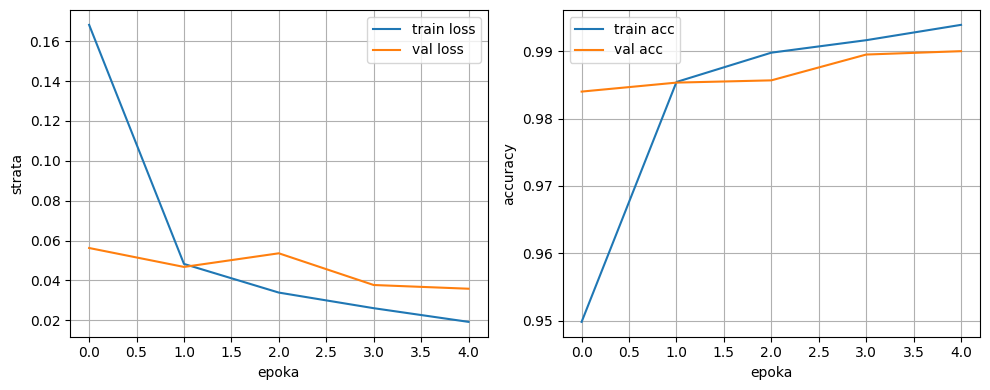

In [ ]:
plt.figure(figsize=(10,4))

# strata
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("epoka")
plt.ylabel("strata")
plt.legend()
plt.grid(True)

# accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("epoka")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Dokładność na zbiorze testowym: {test_acc:.4f}")


Dokładność na zbiorze testowym: 0.9910


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


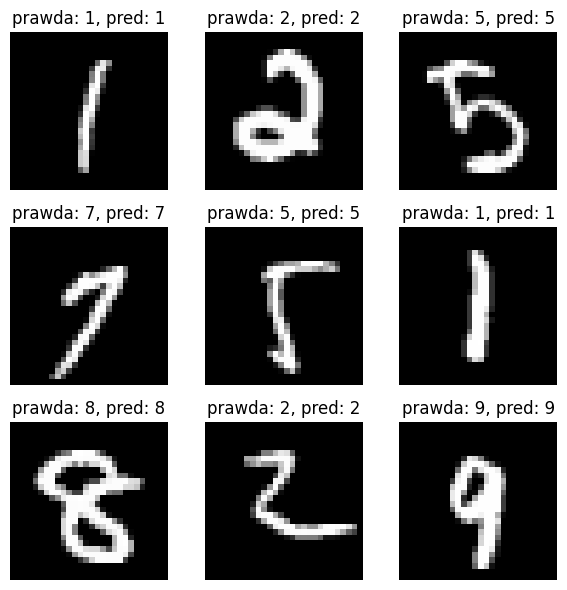

In [ ]:
# wybierz kilka losowych próbek i pokaż predykcje
num_samples = 9
idx = np.random.choice(len(x_test), num_samples, replace=False)
images = x_test[idx]
labels = y_test[idx]
preds = model.predict(images)

plt.figure(figsize=(6, 6))
for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    pred_label = np.argmax(preds[i])
    plt.title(f"prawda: {labels[i]}, pred: {pred_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()
